In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("creditcard.csv")
df.columns = df.columns.str.strip()
df.head()    

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### dectecting outliers 

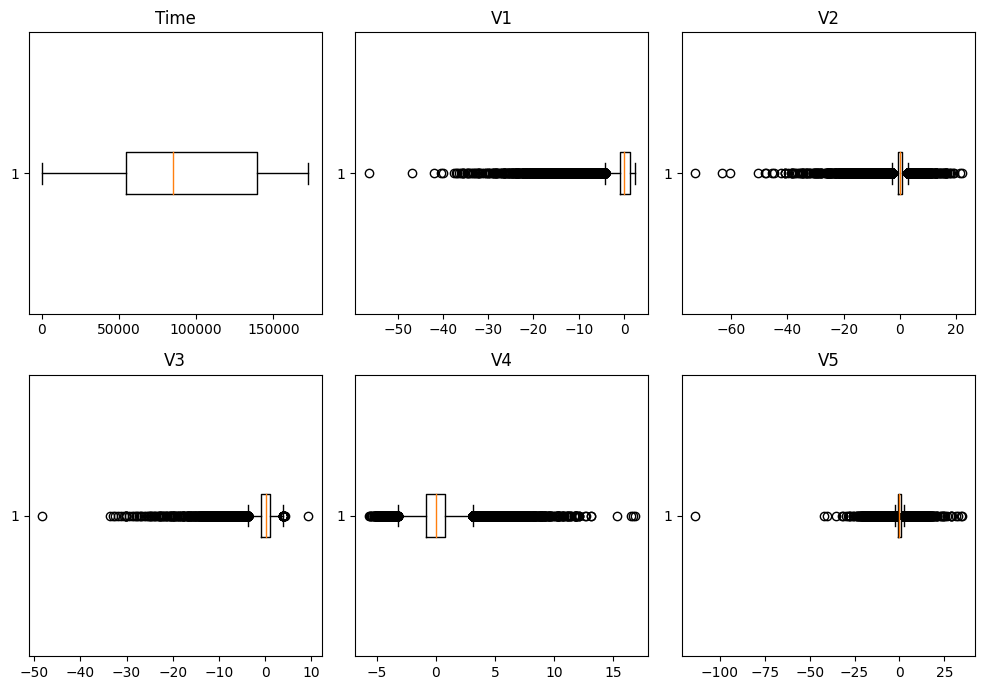

In [7]:
fig, axes = plt.subplots(figsize=(10,7), nrows=2, ncols=3, tight_layout=True)

for ax, col in zip(axes.flat, df.columns):
    
    ax.boxplot(df[col], vert=False)
    ax.set_title(col)
    
plt.show()

### romove outliers 

In [8]:
#define the threshold for z-score
threshold = 3
#calculate Z-scores for each column
Zscores = stats.zscore(df)
#identify outliers
outliers = (Zscores > threshold).any(axis=1)
outliers

0         False
1         False
2         False
3         False
4         False
          ...  
284802     True
284803    False
284804    False
284805     True
284806    False
Length: 284807, dtype: bool

In [9]:
#remove outliers
cleaned_data = df[~outliers]
cleaned_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


### data after remove almost outliers

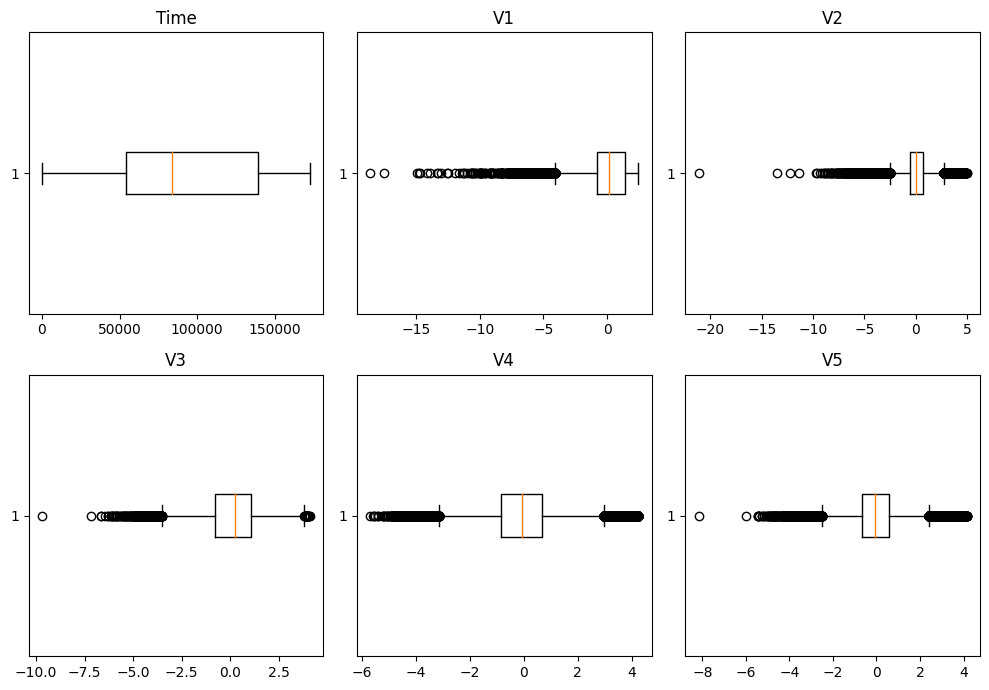

In [10]:
fig, axes = plt.subplots(figsize=(10,7), nrows=2, ncols=3, tight_layout=True)

for ax, col in zip(axes.flat, cleaned_data.columns):
    
    ax.boxplot(cleaned_data[col], vert=False)
    ax.set_title(col)
    
plt.show()

### Visualize the transaction patterns of cleaned data

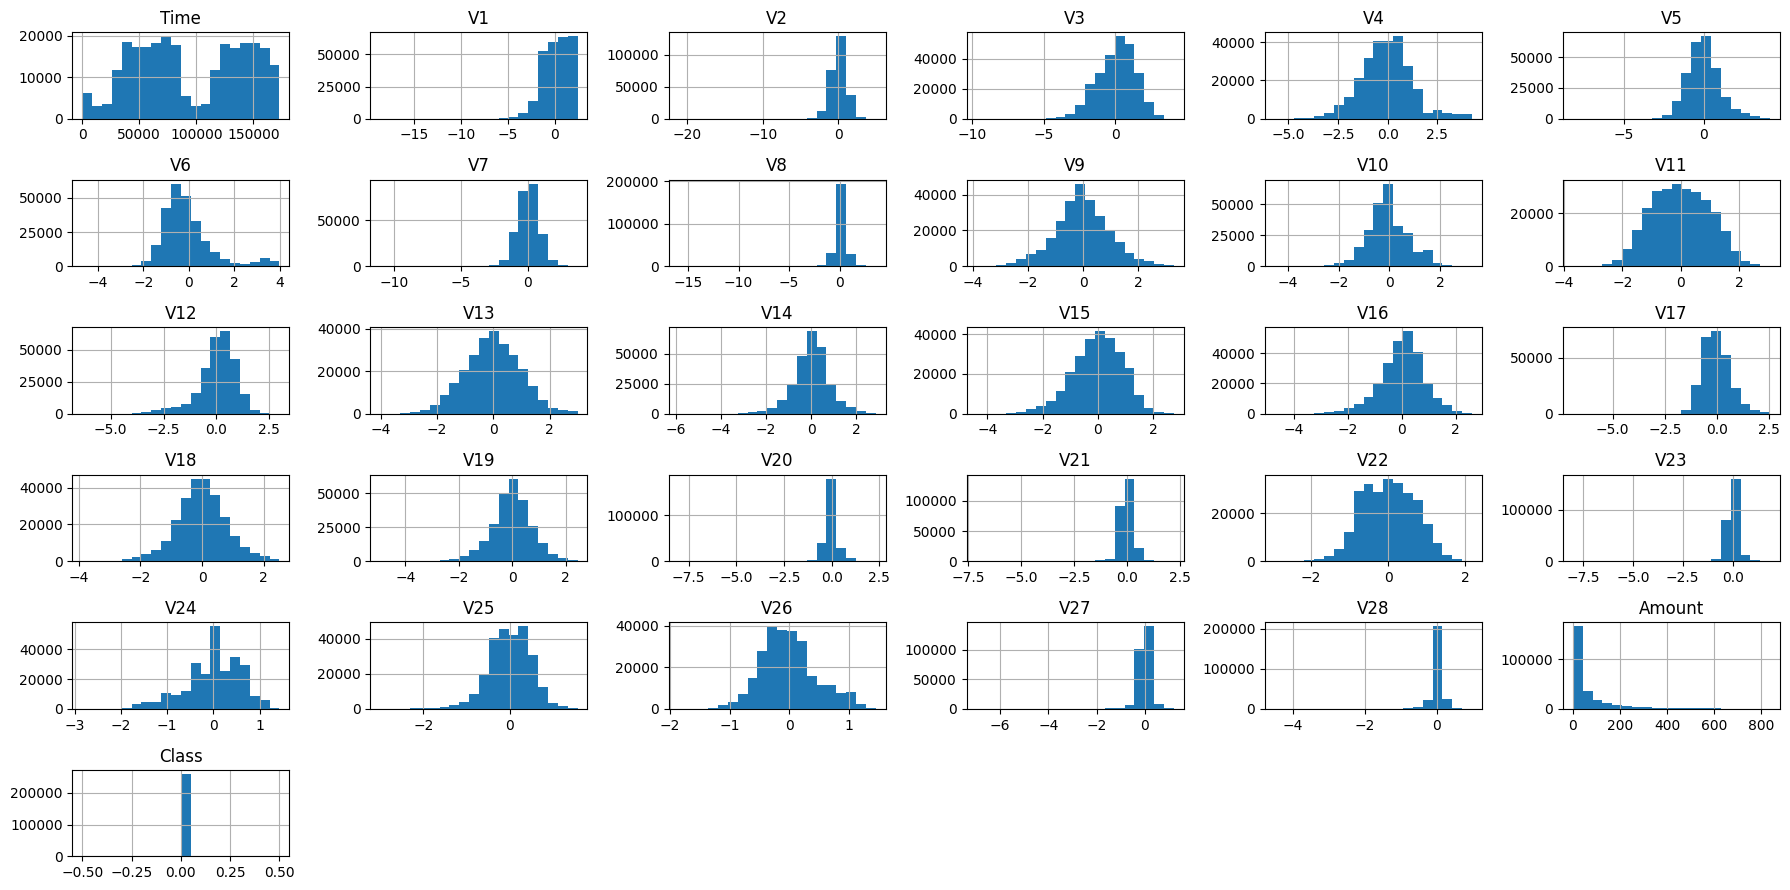

In [11]:
cleaned_data.hist(figsize=(18,9),bins=20)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Amount')

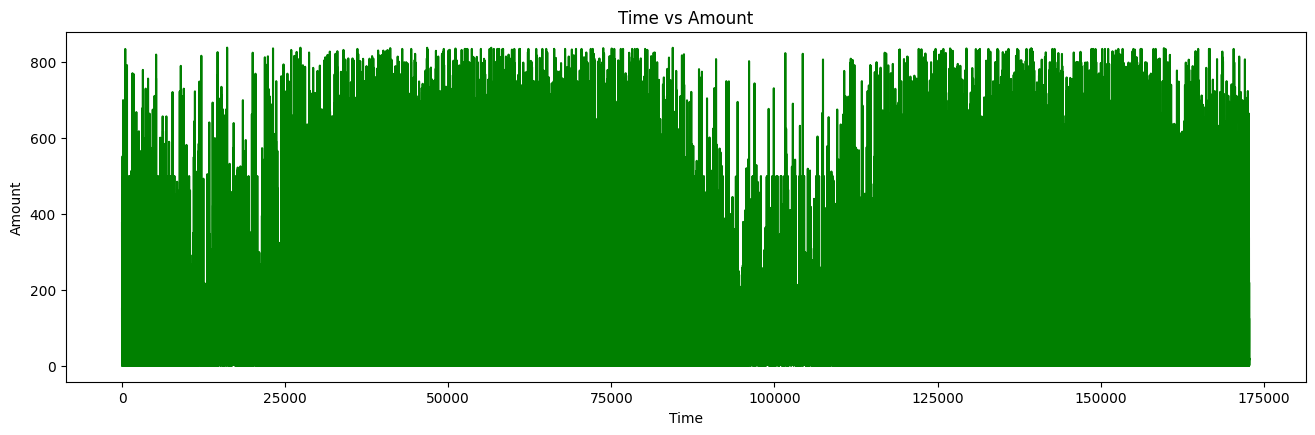

In [12]:
#plot line plots for time vs amount 
plt.figure(figsize=(16, 10))

#line plot for time vs. amount
plt.subplot(2, 1, 1)
plt.plot(cleaned_data['Time'],cleaned_data['Amount'],color="green")
plt.title('Time vs Amount')
plt.xlabel("Time")
plt.ylabel('Amount')



***The above graph showing the trends over time, its a time series graph.it likely depicts some kind of measurement plotted against time.The y-axis shows "Amount" and appears to range from 0 to 800.The x-axis shows "Time" but the increments are not labeled.There are evenly spaced tick marks along the x-axis suggesting the time is measured in equal units.The graph itself is a line plot that starts at a value around 200 and trends slightly upwards as it moves from left to right***

In [13]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### summary statistics for transaction amounts and frequencies.

In [14]:
Stats = cleaned_data.agg({
    'Time' : ['mean','median','min','max','std'],
    'Amount' : ['mean','median','min','max','std'],
})
Stats

,Time,Amount
mean,94498.907934,65.578390
median,83645.000000,21.000000
min,0.000000,0.000000
max,172792.000000,838.360000
std,47463.171678,112.605894


In [15]:
corr_data = cleaned_data[cleaned_data.columns].corr()
corr_data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.166872,-0.015784,-0.518165,-0.132165,0.222785,-0.096211,0.119525,-0.064572,0.013170,...,0.087354,0.143897,0.110122,-0.018165,-0.251637,-0.060701,-0.004712,-0.037899,-0.022839,NaN
V1,0.166872,1.000000,-0.321140,-0.408355,0.149735,-0.139026,-0.031455,-0.208903,-0.165376,0.153721,...,-0.016314,-0.049666,0.103896,0.011614,0.092309,0.008449,0.069247,0.069499,-0.097444,NaN
V2,-0.015784,-0.321140,1.000000,0.048918,0.179172,0.267284,-0.068172,0.415141,0.003022,-0.034788,...,-0.097221,-0.035234,-0.083208,0.029221,-0.053534,0.003773,-0.013501,0.126844,-0.510695,NaN


<Axes: >

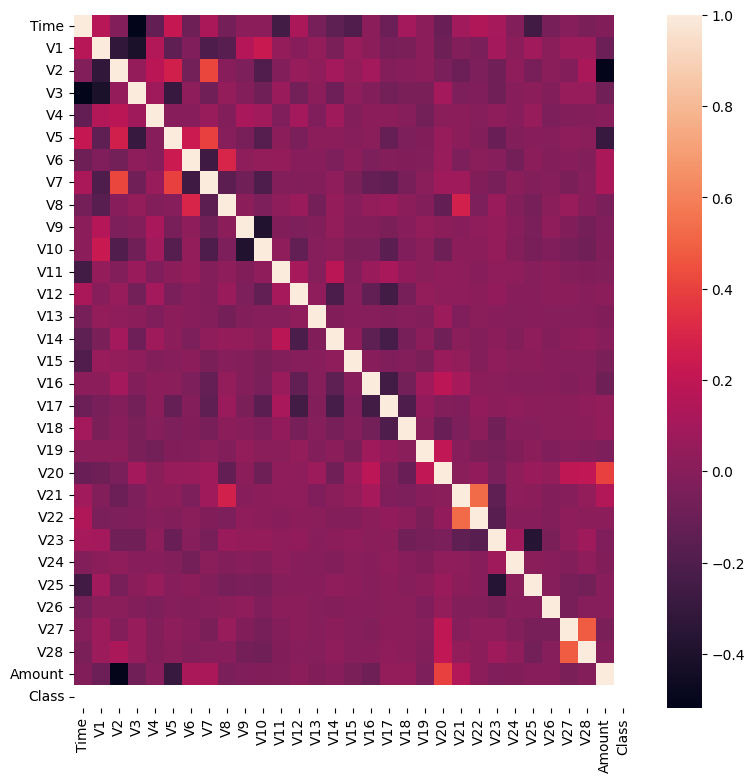

In [16]:
plt.figure(figsize=(9,9))
sns.heatmap(corr_data, annot=None)

***The heatmap helps to see how different features in a dataset relate to each other.In the context of credit card fraud detection, this can help indentify which features might be most useful for building a model to identify fraudulent transactions***

***Color:The color intensity int he heatmap indicates teh strength of the correlation between two features. Darker colors, either red or blue, indicates a stronger coorelation, either positive or negative.Lighter colors indicates a weaker coorelation.***
***Features:The features being compared are listed on both the horizontal and veritcal axes.These can be things like the amount of the transaction,the time of day it occured, the location of the transaction, or any other data points included in the dataset***
***Positive or negative Correlation:A Red color indicates a positive correlation, which means the values tend to move in the same direction.***

```The above heatmap shows:```

```There appears to be a positive correlation between V18 and Amount.This could mean that transaction where features V18 higher has a higher value tend to involve larger amounts of money.```

```There appears to be a negative Correlation between V14 and Amount .This could mean that transaction where features V14 has a higher value tend to involve smaller amounts of money.```

```There appears to be negative correlation between V11 and V28.This means that these two features tend to move on opposite directions.```
